<a href="https://colab.research.google.com/github/Durjoy001/Data-Science/blob/main/text_classification_by_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import glob
import pandas as pd
import numpy as np
import os

In [175]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
path = "/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/*.xlsx"
all_file = glob.glob(path)

In [178]:
all_file


['/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType10.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType1.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType11.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType9.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType3.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType14.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType18.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType17.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType16.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType2.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType5.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType15.xlsx',
 '/content/drive/MyDrive/Colab No

In [197]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    
    
    count.append(len(temp))
    names.append(each.split('/')[1][:-5])
    clusters.append(temp['songType'])
    
    
    data.append(temp)
    
cluster_ids =clusters

In [198]:
data = pd.concat(data)
data = data.sample(frac = 1)

data

,Unnamed: 0,lyrics,songType
715,3204,"এ শুধু অলস মায়া, এ শুধু মেঘের খেলা এ শুধু মনে...",17
115,3625,যখন সময় থমকে দাঁড়ায় নিরাশার পাখি দু’হাত বাড়ায় ...,12
577,3139,তুমি আসবে বলে কাছে ডাকবে বলে ভাল বাসবে ওগো শুধ...,3
150,1146,ভেঙ্গেছে ডানা দুটো আমার ভেঙ্গেছে কোন ঝড়ে নীলিম...,13
37,1155,স্বপনে তাহারে কুড়ায়ে পেয়েছি রেখেছি স্বপনে ঢাকি...,14
...,...,...,...
509,2298,ফুলের মত আমার এ প্রেম দুপায়ে যে মাড়িয়ে গেছে জা...,1
174,704,"ডাইনে বাঁয়ে, গঞ্জে গাঁয়ে, পুরানো অথবা নতুন অধ্...",1
693,3182,মাঝে মাঝে তব দেখা পাই চিরদিন কেন পাই না? কেন ম...,17
112,3570,আমি মরিয়া হইবো শ্রীনন্দের নন্দন তোমাকে বানাবো ...,12


In [199]:
stop_words = [ 'হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ' ]

In [182]:
#stop_words = []

In [200]:
data['lyrics'] = data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [201]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [208]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################

from sklearn.neighbors import KNeighborsClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1, 3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm',KNeighborsClassifier()),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train),cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


predicted = classifier.predict(X_test)

Cross Accuracy: 0.14 (+/- 0.06)


In [209]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.14 (+/- 0.06)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.28      0.12      0.17       337
           2       0.00      0.00      0.00         5
           3       0.50      0.12      0.19       237
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        20
           6       0.28      0.17      0.21        29
           7       0.50      0.01      0.03        67
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        15
          11       0.00      0.00      0.00        15
          12       0.03      0.31      0.06        39
          13       0.26      0.27      0.27       242
          14       0.33      0.05      0.09        20
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [210]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

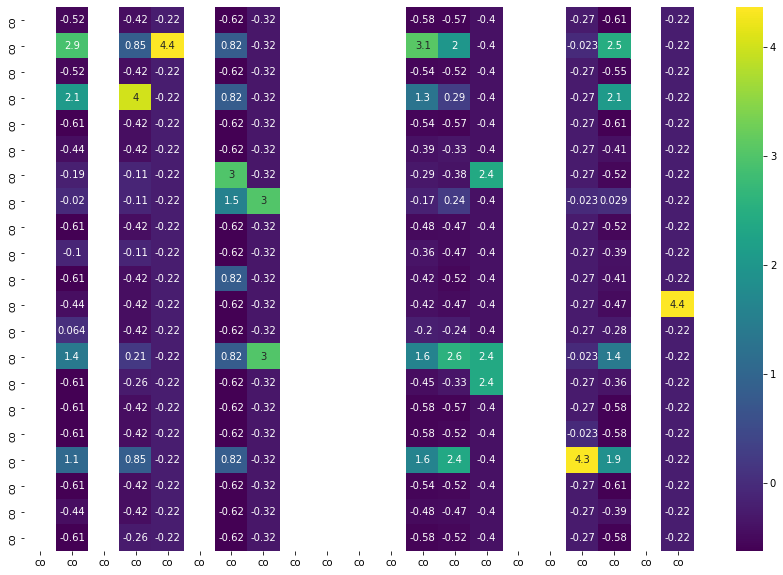

In [211]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array, index = [i for i in names],
              columns = [i for i in names])
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (15,10))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')